In [2]:
import numpy as np
import dynesty
from dynesty import plotting as dyplot
from dynesty import utils as dyfunc
import matplotlib.pyplot as plt
import numba

In [8]:
@numba.njit
def prior_transform(u):
    x = np.empty(2)
    x[0] = 0.4*u[0]
    x[1] = -20+2*u[1]
    return x
    
SN_PEAK_MEAN = -18.34810446702462
SN_PEAK_STD = 0.13805196095807365
    
@numba.njit
def likelihood(p):
    ni_mass, mag_r = p
    model_mag = -16.21 - 16.44*ni_mass + 29.93*ni_mass**2
    log1 = -(mag_r+18.5)**2/0.5
    log2 = -(model_mag-mag_r)**2/0.16
    return log1+log2

sampler = dynesty.NestedSampler(likelihood, prior_transform, 2)
sampler.run_nested()
results = sampler.results

iter: 1313 | +500 | bound: 0 | nc: 1 | ncall: 7028 | eff(%): 25.797 | loglstar:   -inf < -0.002 <    inf | logz: -1.740 +/-  0.025 | dlogz:  0.001 >  0.509                                           

(<Figure size 396x396 with 4 Axes>,
 array([[<AxesSubplot:title={'center':'Nimass = ${0.27}_{-0.13}^{+0.12}$'}>,
         <AxesSubplot:>],
        [<AxesSubplot:xlabel='Nimass', ylabel='magR'>,
         <AxesSubplot:title={'center':'magR = ${-18.37}_{-0.51}^{+0.34}$'}, xlabel='magR'>]],
       dtype=object))

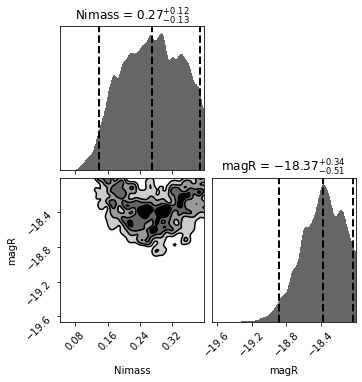

In [9]:
LABELS = ['Nimass', 'magR']
dyplot.cornerplot(results, labels=LABELS, show_titles=True)